### Porjet 7 : Développez une preuve de concept

Dans ce projet, on va réaliser une veille pour trouver une méthode récente pour améliorer la performance d’un modèle, j'ai choisi de reprendre le projet 6 de prédiction de races de chiens 

- Baseline testé précédemment :  **VGG-16**
- Nouveau modèle choisi : **ConvNeXtBase**

###### Présentation du modèle ConvNeXtBase

ConvNeXtBase est un modèle de réseau de neurones convolutifs (CNN) qui modernise la structure classique des CNN en incorporant des techniques de conception inspirées des architectures Transformer, telles que les couches de normalisation de couche et les blocs d'attention. Conçu pour améliorer la performance sur des tâches de vision par ordinateur, il s'aligne sur les avancées récentes en offrant une meilleure efficacité et des performances supérieures par rapport aux modèles traditionnels comme VGG16. ConvNeXtBase se distingue par sa capacité à gérer efficacement des images de haute résolution, ce qui le rend particulièrement adapté pour des applications telles que la classification d'images complexes.

 ConvNeXtBase fait partie de la famille ConvNeXt, qui est conçue pour combiner les avantages des CNN traditionnels avec les innovations récentes issues des architectures de transformateurs. ConvNeXt est conçu pour être plus efficace et performant, en s'appuyant sur les succès des modèles de type Vision Transformer (ViT) tout en conservant la simplicité et l'efficacité des CNN.

Caractéristiques principales de ConvNeXtBase : 

- Architecture Modulaire :
    ConvNeXt adopte une architecture modulaire similaire aux transformateurs, avec des blocs de convolution séparés par des opérations de normalisation et d'activation. Cela permet une meilleure flexibilité et efficacité de l'apprentissage.

- Adaptation des Concepts de Transformateurs :
    ConvNeXt intègre des idées provenant des modèles de transformateurs, telles que l'attention multi-tête et les couches de normalisation, pour améliorer la performance des CNN.

- Efficacité de Calcul :
    ConvNeXt est conçu pour être plus efficace en termes de calcul, avec des couches optimisées et une architecture adaptée pour une exécution rapide sur du matériel moderne comme les GPU.

- Performances Supérieures :
    Les modèles ConvNeXt ont montré des performances supérieures dans les benchmarks récents, surpassant les architectures plus anciennes comme VGG16 et même certains modèles de transformateurs en termes de précision et de rapidité.

###### Comparaison avec VGG16

Avantages de ConvNeXtBase par rapport à VGG16

- Architecture Moderne : ConvNeXtBase est basé sur des conceptions modernes de réseaux de neurones convolutifs, intégrant les dernières avancées en matière de conception de modèles de vision par ordinateur, contrairement à VGG16 qui est une architecture plus ancienne.
- Performance Supérieure : Les modèles ConvNeXt ont montré des performances supérieures sur des tâches de classification d'images dans des benchmarks récents par rapport aux architectures plus anciennes comme VGG16.
- Efficacité de l'Entraînement : ConvNeXt est conçu pour être plus efficace en termes de calcul et de mémoire, permettant une formation plus rapide et nécessitant moins de ressources.
- Meilleure Capacité de Généralisations : Grâce à des conceptions plus récentes, ConvNeXt a une meilleure capacité à généraliser à des ensembles de données variés, ce qui est crucial pour des tâches comme la classification des races de chiens où la variabilité des images peut être élevée.
- Inspiration des Transformeurs : ConvNeXt intègre des idées provenant des modèles de transformeurs, qui ont montré des résultats impressionnants dans le domaine de la vision par ordinateur, augmentant ainsi sa robustesse et son efficacité.

En utilisant ConvNeXtBase, on bénéficera des dernières avancées en matière de réseaux de neurones convolutifs, offrant des performances supérieures et une meilleure capacité de généralisation pour la tâche de classification des races de chiens.

imports

In [2]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ConvNeXtBase, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout



In [2]:
import keras
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.15.0
Keras version: 3.4.1


Téléchargement du dossier ProcessedImages créé dans le projet 6

In [4]:
# Chemin vers le dossier contenant les images de chiens 
#dogImages_folder = 'data/ProcessedImages'


Ce dossier contient 120 races, on va choisir 6 races sur lequel je pourrais tester le modèle de prédiction 

Pour choisir 6 races de chiens très différentes les unes des autres parmi les 120 races fournies, il est important de sélectionner des races avec des caractéristiques distinctes en termes de taille, morphologie, pelage, et origine. Voici les 6 races choisies 

- Saluki
- Chihuahua
- Saint_Bernard
- German_shepherd
- French_bulldog
- Siberian_husky



In [5]:
#Liste des chiens séléctionnés
dogs_selected = ['Saluki', 'Chihuahua', 'Saint_Bernard', 'German_shepherd', 'French_bulldog', 'Siberian_husky']

In [5]:
path_6_dogs = 'data/selectedDogs2'
#path_6_dogs = '/kaggle/input/dataset-6/selectedDogs2'


In [7]:

def check_directory(path):
    """
    Vérifier l'existence d'un dossier et afficher son contenu.

    Parameters:
    - path: Chemin vers le dossier à vérifier.
    """
    if os.path.exists(path):
        print(f"Le dossier '{path}' existe.")
        subfolders = [f.path for f in os.scandir(path) if f.is_dir()]
        print(f"Le dossier contient les sous-dossiers suivants :")
        for folder in subfolders:
            print(f"- {folder}")
            files = os.listdir(folder)
            print(f"  Contient {len(files)} fichiers/images.")
    else:
        print(f"Le dossier '{path}' n'existe pas.")




In [8]:
check_directory(path_6_dogs)

Le dossier '/kaggle/input/dataset-6/selectedDogs2' existe.
Le dossier contient les sous-dossiers suivants :
- /kaggle/input/dataset-6/selectedDogs2/Saluki
  Contient 400 fichiers/images.
- /kaggle/input/dataset-6/selectedDogs2/Siberian_husky
  Contient 384 fichiers/images.
- /kaggle/input/dataset-6/selectedDogs2/German_shepherd
  Contient 304 fichiers/images.
- /kaggle/input/dataset-6/selectedDogs2/Chihuahua
  Contient 304 fichiers/images.
- /kaggle/input/dataset-6/selectedDogs2/French_bulldog
  Contient 318 fichiers/images.
- /kaggle/input/dataset-6/selectedDogs2/Saint_Bernard
  Contient 340 fichiers/images.


In [9]:
def copy_specific_races(processed_images_path, new_path, races):
    """
    Copier les images des races spécifiées dans un nouveau dossier.

    Parameters:
    - processed_images_path (str): Chemin vers le dossier contenant les images traitées.
    - new_path (str): Chemin vers le nouveau dossier.
    - races (list): Liste des noms de races à copier.
    """
    if not os.path.exists(new_path):
        os.makedirs(new_path)
    
    for race in races:
        source_race_path = os.path.join(processed_images_path, race)
        dest_race_path = os.path.join(new_path, race)
        
        if not os.path.exists(dest_race_path):
            os.makedirs(dest_race_path)
        
        if os.path.isdir(source_race_path):
            images = [f for f in os.listdir(source_race_path) if os.path.isfile(os.path.join(source_race_path, f))]
            for image in images:
                source_image_path = os.path.join(source_race_path, image)
                dest_image_path = os.path.join(dest_race_path, image)
                shutil.copy(source_image_path, dest_image_path)
        else:
            print(f"Race folder not found: {source_race_path}")



In [10]:
#copy_specific_races(dogImages_folder, path_10_dogs, dogs_selected)

In [11]:
def display_folder_image_counts(new_path):
    """
    Afficher les noms des dossiers dans new_path et le nombre d'images dans chaque dossier.
    Retourner le nombre total d'images dans tous les sous-dossiers.

    Parameters:
    - new_path: Chemin vers le dossier contenant les sous-dossiers des races.
    """
    if not os.path.exists(new_path):
        print(f"Path not found: {new_path}")
        return 0
    
    total_images = 0
    races = [d for d in os.listdir(new_path) if os.path.isdir(os.path.join(new_path, d))]
    
    for race in races:
        race_path = os.path.join(new_path, race)
        images = [f for f in os.listdir(race_path) if os.path.isfile(os.path.join(race_path, f))]
        num_images = len(images)
        total_images += num_images
        print(f"Race: {race}, Nombre d'images: {num_images}")
    
    return total_images


In [12]:
total_images = display_folder_image_counts(path_6_dogs)

Race: Saluki, Nombre d'images: 400
Race: Siberian_husky, Nombre d'images: 384
Race: German_shepherd, Nombre d'images: 304
Race: Chihuahua, Nombre d'images: 304
Race: French_bulldog, Nombre d'images: 318
Race: Saint_Bernard, Nombre d'images: 340


In [13]:
print(f"Nombre total des images : {total_images}")

Nombre total des images : 2050


In [3]:
def show_dogImages_sample(dogImages_folder):
    """
    Afficher un exemple d'image de chaque sous dossier (race de chiens)
    """
    subdirs = [d for d in os.listdir(dogImages_folder) if os.path.isdir(os.path.join(dogImages_folder, d))]
    num_subdirs = len(subdirs)
    num_cols = 3
    num_rows = (num_subdirs + num_cols - 1) // num_cols  # calcul nombre de ligne

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

    for ax, subdir in zip(axes.flatten(), subdirs):
        subdir_folder = os.path.join(dogImages_folder, subdir)
        images = os.listdir(subdir_folder)
        if images:
            img_path = os.path.join(subdir_folder, random.choice(images))
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(subdir)
            ax.axis('off')
        else:
            ax.axis('off')  

    for ax in axes.flatten()[len(subdirs):]:
        ax.axis('off')  # pour cacher les axes non utilisés

    plt.tight_layout()
    plt.show()


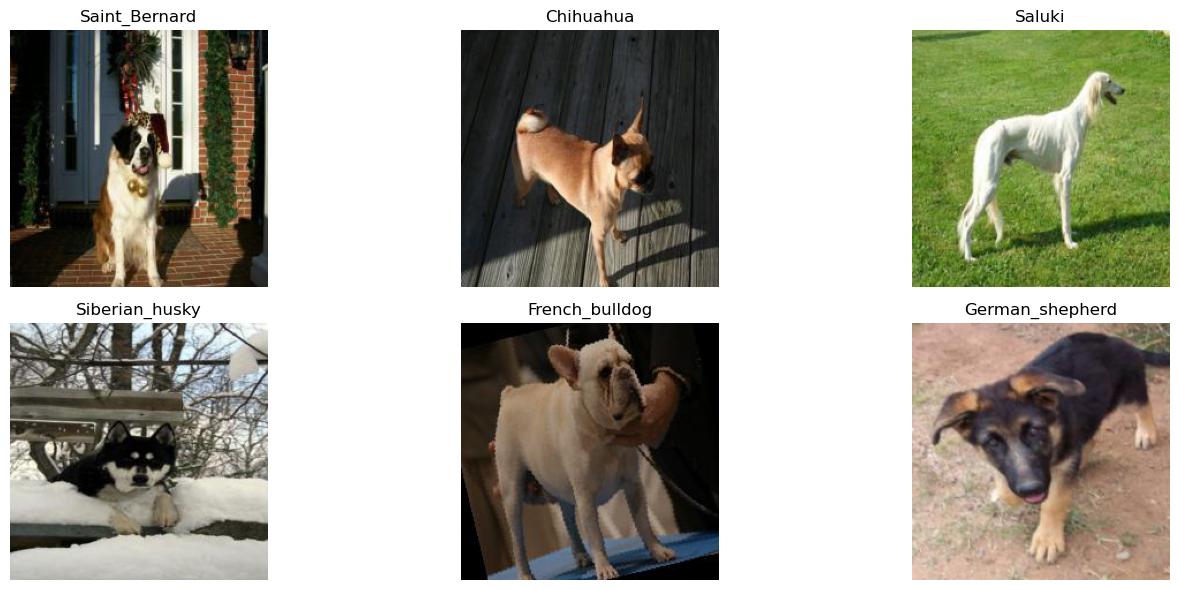

In [11]:
show_dogImages_sample(path_6_dogs)
    

In [16]:
def get_folder_image_counts(path):
    """
    Obtenir les noms des dossiers dans path et le nombre d'images dans chaque dossier.

    input:
    - path: Chemin vers le dossier contenant les sous-dossiers des races.

    output:
    - DataFrame contenant les noms des races et le nombre d'images.
    """
    if not os.path.exists(path):
        print(f"Path not found: {path}")
        return pd.DataFrame(columns=['Race', 'Nombre d\'images'])
    
    data = []
    
    races = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    
    for race in races:
        race_path = os.path.join(path, race)
        images = [f for f in os.listdir(race_path) if os.path.isfile(os.path.join(race_path, f))]
        data.append({'Race': race, 'Nombre d\'images': len(images)})
    
    df = pd.DataFrame(data)
    return df




In [17]:
get_folder_image_counts(path_6_dogs)

,Race,Nombre d'images
0,Saluki,400
1,Siberian_husky,384
2,German_shepherd,304
3,Chihuahua,304
4,French_bulldog,318
5,Saint_Bernard,340


###### Préparation des données

In [18]:
def evaluate_model(model, model_name):
    # Évaluer le modèle
    val_loss, val_accuracy = model.evaluate(validation_generator)
    print(f"Validation Accuracy: {val_accuracy}")
    print(f"Validation Loss: {val_loss}")

    # Ajouter les résultats au DataFrame existant
    return pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [val_accuracy],
        'Loss': [val_loss]
    })
        


In [19]:
# Visualiser les courbes de perte et de précision
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')

    plt.show()

In [20]:
def plot_confusion_matrix(model, validation_generator):
    """
    Affiche la matrice de confusion pour les prédictions du modèle.

    Parameters:
    - model: Le modèle entraîné.
    - validation_generator: Générateur de données de validation.
    """
    y_true = validation_generator.classes
    y_pred = model.predict(validation_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
     
    # Rotation des étiquettes de l'axe x
    plt.xticks(rotation=90)
    
    plt.show()

In [21]:
# Définir les paramètres
batch_size = 32
image_size = (224, 224)
learning_rate = 0.001 #O.OO5 ou 0.01
num_epochs = 100

In [22]:
# Préparation des données
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% pour l'entraînement et 20% pour la validation
)

In [23]:
train_generator = datagen.flow_from_directory(
    path_6_dogs,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    path_6_dogs,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1643 images belonging to 6 classes.
Found 407 images belonging to 6 classes.


### Modèle VGG16

In [24]:
# Création du modèle
def get_vgg16_model():
    # Charger le modèle VGG-16 avec les poids pré-entraînés
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    # Geler les couches du modèle de base
    for layer in base_model.layers:
        layer.trainable = False
        
    # Ajouter des couches de classification
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model

In [25]:
model_vgg16 = get_vgg16_model()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
# Compilation du modèle
model_vgg16.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Entraînement du modèle
history_vgg16 = model_vgg16.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=num_epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
    ]
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-07-29 13:58:04.080278: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63498, expected 3.85968
2024-07-29 13:58:04.080327: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.55784, expected 5.78254
2024-07-29 13:58:04.080342: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.61282, expected 5.83752
2024-07-29 13:58:04.080359: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.34499, expected 5.56968
2024-07-29 13:58:04.080374: E external/local_xla/xla/service/gpu/buffer_comparator.cc:11

 2/52 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.1094 - loss: 2.1379  

I0000 00:00:1722261499.689065     118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18/52 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.1878 - loss: 1.8996

2024-07-29 13:58:22.454999: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.18376, expected 3.42997
2024-07-29 13:58:22.455072: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.33565, expected 4.58186
2024-07-29 13:58:22.455081: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.70509, expected 3.95129
2024-07-29 13:58:22.455089: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.361, expected 4.60721
2024-07-29 13:58:22.455097: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.17522, expected 4.42143
2024-07-29 13:58:22.455105: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.39461, expected 3.64082
2024-07-29 13:58:22.455129: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 4.45438, expected 3.70059
2024-07-29 13:58:22.455138: E external/local_xla/xla/serv

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.2263 - loss: 1.8275

2024-07-29 13:58:35.434581: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150528: 4.38462, expected 3.57489
2024-07-29 13:58:35.434646: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150529: 4.90744, expected 4.09771
2024-07-29 13:58:35.434656: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150530: 5.28052, expected 4.47079
2024-07-29 13:58:35.434665: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150531: 5.54085, expected 4.73112
2024-07-29 13:58:35.434673: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150532: 4.33636, expected 3.52662
2024-07-29 13:58:35.434681: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150533: 5.02811, expected 4.21837
2024-07-29 13:58:35.434690: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150534: 5.7047, expected 4.89496
2024-07-29 13:58:35.4

52/52 ━━━━━━━━━━━━━━━━━━━━ 46s 508ms/step - accuracy: 0.2270 - loss: 1.8259 - val_accuracy: 0.3391 - val_loss: 1.6583 - learning_rate: 0.0010
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.3709 - loss: 1.5755 - val_accuracy: 0.3636 - val_loss: 1.5665 - learning_rate: 0.0010
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.4650 - loss: 1.4211 - val_accuracy: 0.4570 - val_loss: 1.4865 - learning_rate: 0.0010
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5235 - loss: 1.3009 - val_accuracy: 0.4717 - val_loss: 1.4111 - learning_rate: 0.0010
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.5684 - loss: 1.2330 - val_accuracy: 0.5258 - val_loss: 1.3401 - learning_rate: 0.0010
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5993 - loss: 1.1564 - val_accuracy: 0.5332 - val_loss: 1.2903 - learning_rate: 0.0010
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.6184 - loss: 1.1156 - val_accura

In [28]:
# Évaluation du modèle
df1 = evaluate_model(model_vgg16, 'VGG-16')


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6584 - loss: 0.9042
Validation Accuracy: 0.6216216087341309
Validation Loss: 1.0069493055343628


In [29]:
df1

,Model,Accuracy,Loss
0,VGG-16,0.621622,1.006949


###### Courbes d'apprentissage

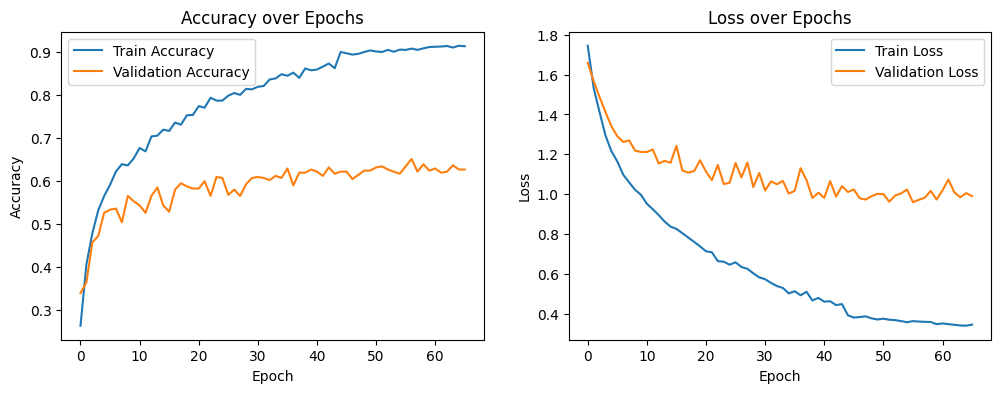

In [30]:
# Courbes d'apprentissage
plot_learning_curves(history_vgg16)

###### Matrice de confusion

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step


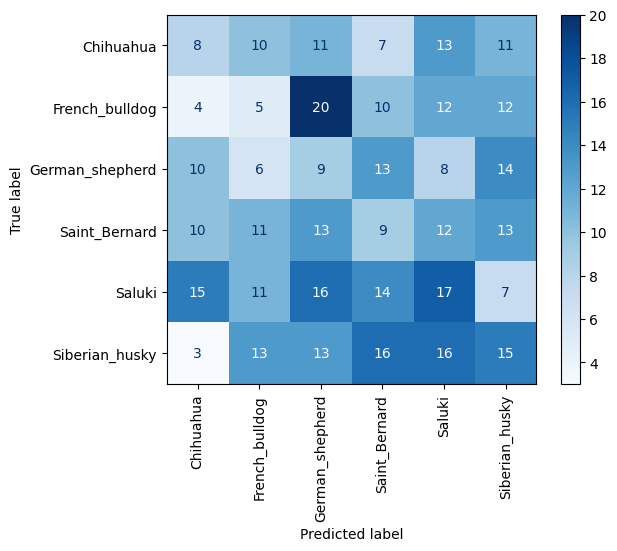

In [31]:
# Matrice de confusion
plot_confusion_matrix(model_vgg16, validation_generator)

### Modèle ConvNeXtBase

In [94]:
from tensorflow.keras.layers import BatchNormalization
# Création du modèle
def get_conv_model():
    base_model = ConvNeXtBase(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
   # Geler les couches du modèle de base
    for layer in base_model.layers:
        layer.trainable = False
        
  # Dégeler les 30 dernières couches
    for layer in base_model.layers[-30:]:
        layer.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    
     # 1ere couche dense
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # 2eme couche dense 
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    # 3eme couche dense 
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

    # Compiler le modèle
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [95]:
model = get_conv_model()

In [96]:
# callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)


###### Entraînement du modèle

In [97]:
# Entraînement du modèle
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/100


W0000 00:00:1722267076.611088     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267076.611465     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267076.611973     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267076.619414     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267076.620419     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267076.621112     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267076.622764     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


37/52 ━━━━━━━━━━━━━━━━━━━━ 10s 689ms/step - accuracy: 0.2880 - loss: 2.2804

W0000 00:00:1722267101.572584     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267101.572982     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267101.573501     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267101.574623     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267101.575000     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267101.575378     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267101.581887     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267101.582292     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.2988 - loss: 2.1885

W0000 00:00:1722267111.306127     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267111.306461     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267111.306913     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267117.284943     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267117.285294     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267117.285754     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267117.288041     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267117.288427     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 83s 805ms/step - accuracy: 0.2995 - loss: 2.1834 - val_accuracy: 0.2359 - val_loss: 2.4356 - learning_rate: 0.0010
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.4794 - loss: 1.3427 - val_accuracy: 0.5307 - val_loss: 1.5180 - learning_rate: 0.0010
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.5737 - loss: 1.1151 - val_accuracy: 0.6732 - val_loss: 0.9430 - learning_rate: 0.0010
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 283ms/step - accuracy: 0.6799 - loss: 0.8824 - val_accuracy: 0.7322 - val_loss: 0.7485 - learning_rate: 0.0010
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - accuracy: 0.7431 - loss: 0.7424 - val_accuracy: 0.6732 - val_loss: 1.1269 - learning_rate: 0.0010
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 278ms/step - accuracy: 0.8191 - loss: 0.6382 - val_accuracy: 0.7371 - val_loss: 0.8646 - learning_rate: 0.0010
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 278ms/step - accuracy: 0.8899 - loss: 0.4257 

###### Évaluation du modèle

In [98]:
# Évaluation du modèle
df2 = evaluate_model(model, 'ConvNeXtBase')

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.8272 - loss: 0.6220
Validation Accuracy: 0.8206388354301453
Validation Loss: 0.6587228178977966


In [99]:
df2

,Model,Accuracy,Loss
0,ConvNeXtBase,0.820639,0.658723


In [100]:
train_generator.num_classes

6

###### Courbes d'apprentissage

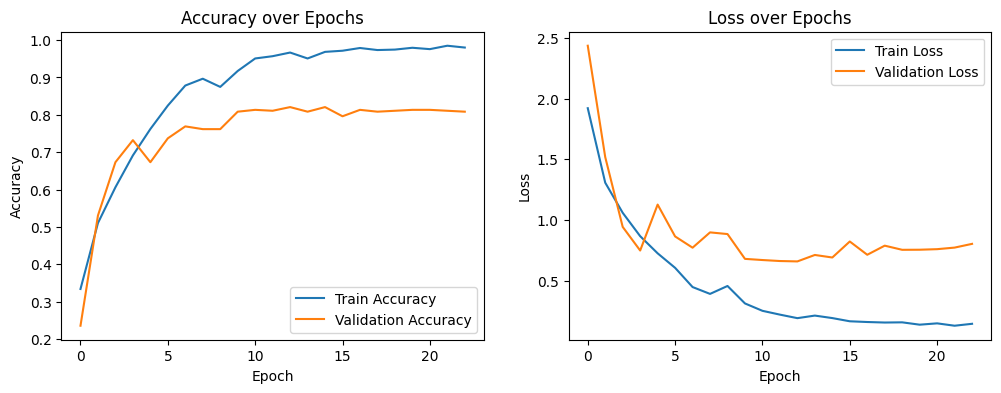

In [101]:
# Courbes d'apprentissage
plot_learning_curves(history)

###### Matrice de confusion

 2/13 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step

W0000 00:00:1722267564.844333     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267564.844729     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267564.845150     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 698ms/step


W0000 00:00:1722267573.215793     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267573.216521     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267573.217026     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267573.219667     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267573.220051     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267573.220425     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267573.220812     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722267573.221170     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


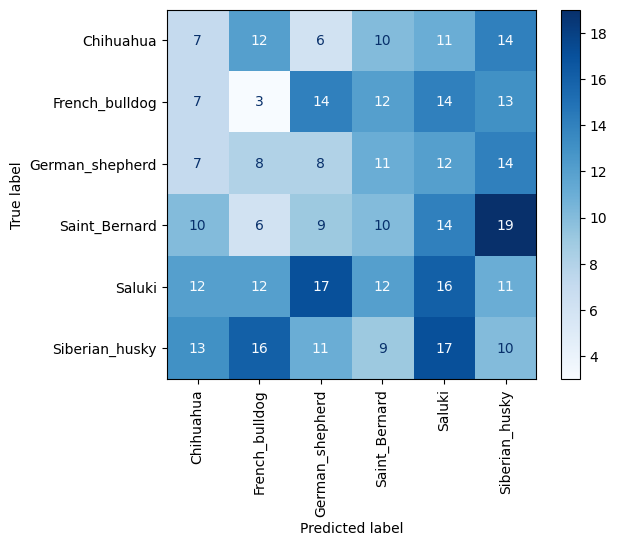

In [102]:
# Matrice de confusion
plot_confusion_matrix(model, validation_generator)

###### Recherche d'hyperparamètres (not done)

Configuration de la recherche d'hyperparamètres

Utiliser GridSearchCV pour rechercher les meilleurs hyperparamètres

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

In [104]:


class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, epochs=50, batch_size=32, learning_rate=0.001, **kwargs):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.kwargs = kwargs  # Store additional hyperparameters
        self.model = None

    def fit(self, X, y=None):
        print(type(X), type(y))
        print("inside fit, build_fn...")
        self.model = self.build_fn(learning_rate=self.learning_rate, **self.kwargs)
        print("fitting model...")
        train_generator, validation_generator = X
        self.model.fit(train_generator, validation_generator, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=-1)

    def predict_proba(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        return self.model.evaluate(X, y, verbose=0)[1]  # Returns accuracy



In [105]:
# Utiliser KerasClassifierWrapper pour intégrer le modèle à GridSearchCV
best_model = KerasClassifierWrapper(build_fn=get_conv_model, epochs=10)

In [106]:
# Définir le param_grid avec les hyperparamètres
param_grid = {
    'batch_size': [16, 32, 64],
    'learning_rate': [0.001, 0.005, 0.01],
    'dropout': [0.3, 0.5, 0.7]
}

In [107]:
# Initialiser GridSearchCV
grid = GridSearchCV(estimator=best_model, param_grid=param_grid, n_jobs=1, cv=3)

In [108]:
train_generator.image_shape, validation_generator.image_shape

((224, 224, 3), (224, 224, 3))

In [109]:
# Entraîner le modèle avec GridSearchCV
#grid_result = grid.fit(train_generator, validation_generator)



In [110]:
# Résumer les meilleurs hyperparamètres
'''
best_hps = grid_result.best_params_
print(f"Meilleurs hyperparamètres : {best_hps}")
'''

'\nbest_hps = grid_result.best_params_\nprint(f"Meilleurs hyperparamètres : {best_hps}")\n'

In [111]:
# Construire le modèle avec les meilleurs hyperparamètres
#best_model = create_model(learning_rate=best_hps['learning_rate'], dropout_rate=best_hps['dropout_rate'])


In [112]:
'''
# Entraîner le modèle avec les meilleurs hyperparamètres
history_best_model = best_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    batch_size=best_hps['batch_size'],
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
    ]
)
'''

"\n# Entraîner le modèle avec les meilleurs hyperparamètres\nhistory_best_model = best_model.fit(\n    train_generator,\n    validation_data=validation_generator,\n    epochs=10,\n    batch_size=best_hps['batch_size'],\n    callbacks=[\n        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),\n        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)\n    ]\n)\n"

In [113]:
# Évaluer le modèle
#df3 = evaluate_model(best_model, 'ConvNeXtBase optimized')

In [114]:

#df3

In [115]:
#plot_learning_curves(history_best_model)

In [116]:
# Matrice de confusion
#plot_confusion_matrix(best_model, validation_generator)

#### Affichage des résultats

In [117]:
# Concaténer les DataFrames
results_df = pd.concat([df1, df2], ignore_index=True)

In [118]:
results_df

,Model,Accuracy,Loss
0,VGG-16,0.621622,1.006949
1,ConvNeXtBase,0.820639,0.658723


###### Sauvegarde du Modèle

In [119]:
# Sauvegarder le modèle sur Kaggle
model.save('/kaggle/working/dog_breed_classifier_6.keras')


In [120]:
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
loaded_model = load_model('/kaggle/working/dog_breed_classifier_6.keras')


In [121]:

# Fonction pour comparer les poids des 2 modeles sauvegardé et uploadé
def compare_model_weights(model1, model2):
    weights1 = model1.get_weights()
    weights2 = model2.get_weights()
    
    if len(weights1) != len(weights2):
        print("Models have different numbers of weights.")
        return False
    
    for w1, w2 in zip(weights1, weights2):
        if not np.allclose(w1, w2, atol=1e-6):  # Compare with a tolerance
            print("Weights are different.")
            return False
    
    print("Models have identical weights.")
    return True




In [122]:
# Comparer les poids des modèles
compare_model_weights(model, loaded_model)

Models have identical weights.


True